In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif



# Load the dataset

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=columns)

# Preprocess the dataset

In [ ]:
data = data.replace('?', np.nan)  # Replace missing values with NaN
data = data.dropna()  # Drop rows with missing values
data['target'] = np.where(data['target'] > 0, 1, 0)  # Convert target values to binary

# Split the dataset into features and target

In [ ]:
X = data.drop('target', axis=1)
y = data['target']

# Function to evaluate a model

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1


# Function to plot ROC curve

In [ ]:
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend()

# Function to plot confusion matrix

In [ ]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(4, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
    plt.yticks([0, 1], ['No Heart Disease', 'Heart Disease'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



# Split the dataset into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluate_model(lr, X_train, X_test, y_train, y_test)
print('Logistic Regression Results:')
print('Accuracy:', lr_accuracy)
print('Precision:', lr_precision)
print('Recall:', lr_recall)
print('F1 Score:', lr_f1)

Logistic Regression Results:
Accuracy: 0.8666666666666667
Precision: 0.8076923076923077
Recall: 0.875
F1 Score: 0.8400000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# ROC Curve and Confusion Matrix for Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


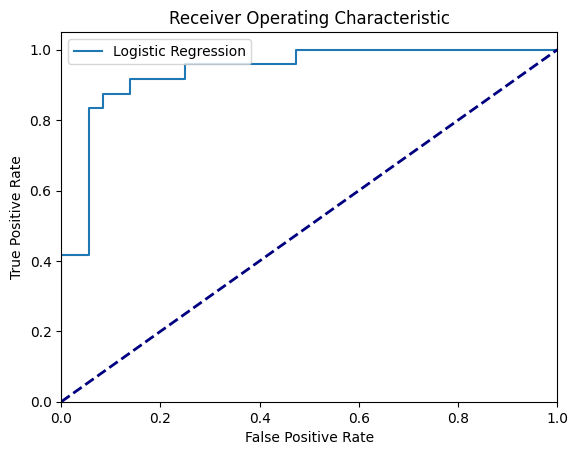

In [78]:
lr.fit(X_train, y_train)
y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba)
plot_roc_curve(fpr_lr, tpr_lr, 'Logistic Regression')

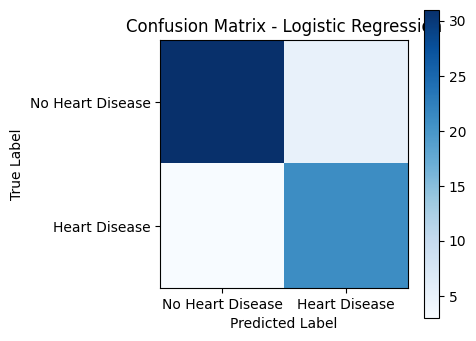

In [ ]:
y_pred = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_lr, 'Confusion Matrix - Logistic Regression')


#Number of Features vs. Accuracy for Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

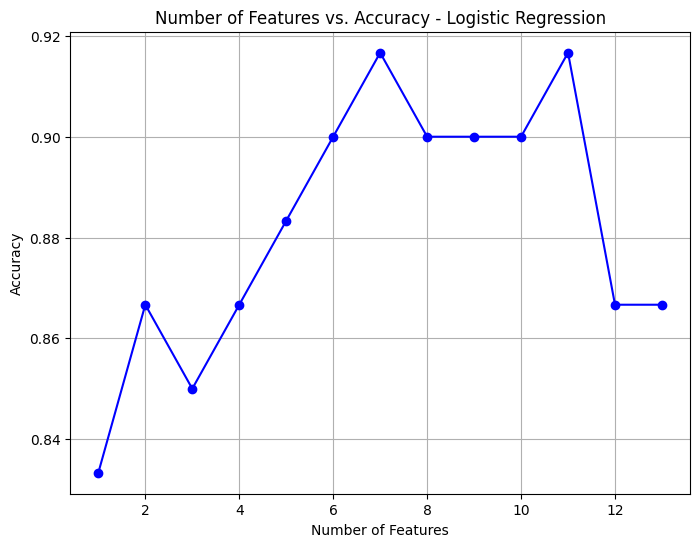

In [77]:
def calculate_accuracy(num_features):
    selector = SelectKBest(f_classif, k=num_features)
    X_train_new = selector.fit_transform(X_train, y_train)
    X_test_new = selector.transform(X_test)

    model = LogisticRegression()
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
accuracies = []
for k in range(1, num_features + 1):
    accuracy = calculate_accuracy(k)
    accuracies.append(accuracy)

# Plot Number of Features vs. Accuracy for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_features + 1), accuracies, 'bo-')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy - Logistic Regression')
plt.grid(True)
plt.show()    

# Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate_model(dt, X_train, X_test, y_train, y_test)
print('Decision Tree Results:')
print('Accuracy:', dt_accuracy)
print('Precision:', dt_precision)
print('Recall:', dt_recall)
print('F1 Score:', dt_f1)

Decision Tree Results:
Accuracy: 0.7833333333333333
Precision: 0.6774193548387096
Recall: 0.875
F1 Score: 0.7636363636363636


# ROC Curve and Confusion Matrix for Decision Tree

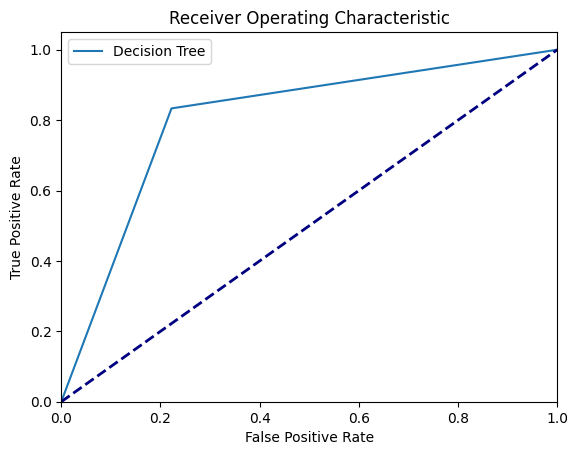

In [ ]:
dt.fit(X_train, y_train)
y_pred_proba = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba)
plot_roc_curve(fpr_dt, tpr_dt, 'Decision Tree')

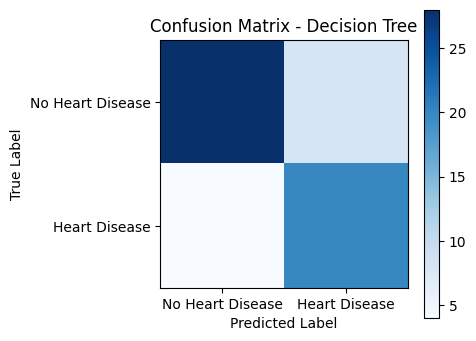

In [ ]:
y_pred = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_dt, 'Confusion Matrix - Decision Tree')


# Number of Features vs. Accuracy for Decision Tree

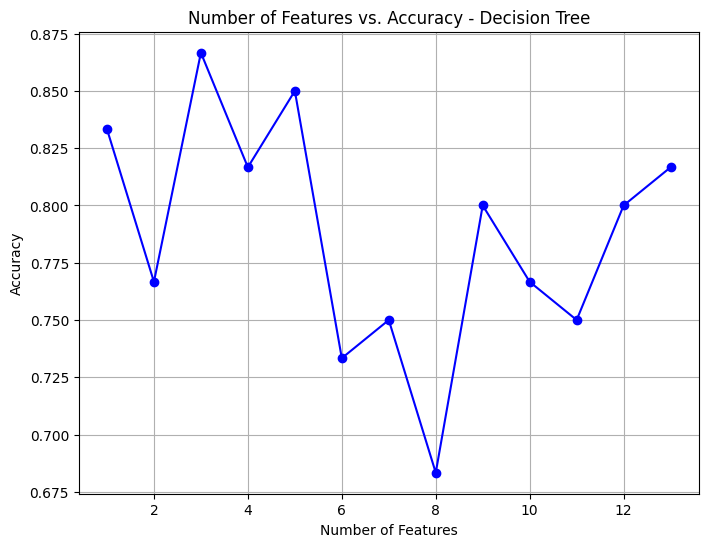

In [ ]:
def calculate_accuracy(num_features):
    selector = SelectKBest(f_classif, k=num_features)
    X_train_new = selector.fit_transform(X_train, y_train)
    X_test_new = selector.transform(X_test)

    model = DecisionTreeClassifier()
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

accuracies = []
for k in range(1, num_features + 1):
    accuracy = calculate_accuracy(k)
    accuracies.append(accuracy)

# Plot Number of Features vs. Accuracy for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_features + 1), accuracies, 'bo-')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy - Decision Tree')
plt.grid(True)
plt.show()

# Random Forest

In [ ]:
rf = RandomForestClassifier()
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf, X_train, X_test, y_train, y_test)
print('Random Forest Results:')
print('Accuracy:', rf_accuracy)
print('Precision:', rf_precision)
print('Recall:', rf_recall)
print('F1 Score:', rf_f1)


Random Forest Results:
Accuracy: 0.8166666666666667
Precision: 0.76
Recall: 0.7916666666666666
F1 Score: 0.7755102040816326


# ROC Curve and Confusion Matrix for Random Forest

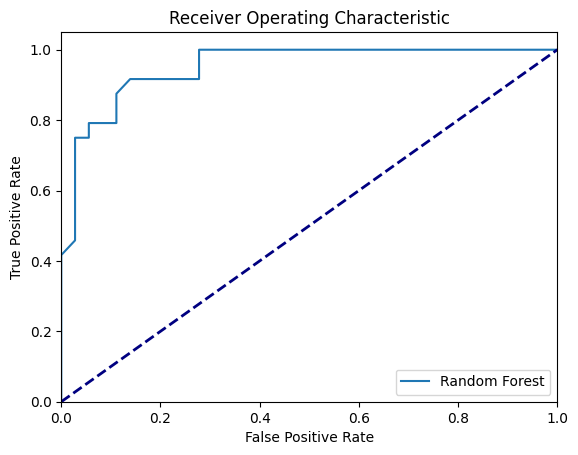

In [ ]:
rf.fit(X_train, y_train)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba)
plot_roc_curve(fpr_rf, tpr_rf, 'Random Forest')

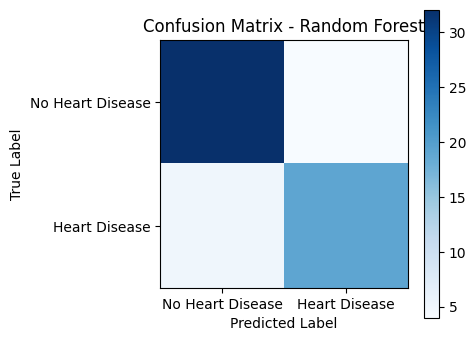

In [ ]:
y_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_rf, 'Confusion Matrix - Random Forest')


# Number of Features vs. Accuracy for Random Forest

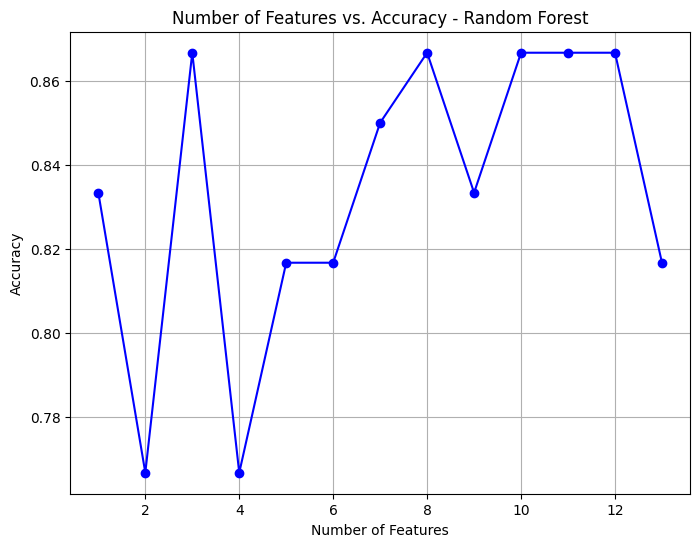

In [ ]:
def calculate_accuracy(num_features):
    selector = SelectKBest(f_classif, k=num_features)
    X_train_new = selector.fit_transform(X_train, y_train)
    X_test_new = selector.transform(X_test)

    model = RandomForestClassifier()
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
accuracies = []
for k in range(1, num_features + 1):
    accuracy = calculate_accuracy(k)
    accuracies.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_features + 1), accuracies, 'bo-')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy - Random Forest')
plt.grid(True)
plt.show()    

# Support Vector Machine

In [ ]:
svm = SVC(probability=True)
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(svm, X_train, X_test, y_train, y_test)
print('Support Vector Machine Results:')
print('Accuracy:', svm_accuracy)
print('Precision:', svm_precision)
print('Recall:', svm_recall)
print('F1 Score:', svm_f1)

Support Vector Machine Results:
Accuracy: 0.6666666666666666
Precision: 0.6428571428571429
Recall: 0.375
F1 Score: 0.4736842105263159


# ROC Curve and Confusion Matrix for Support Vector Machine

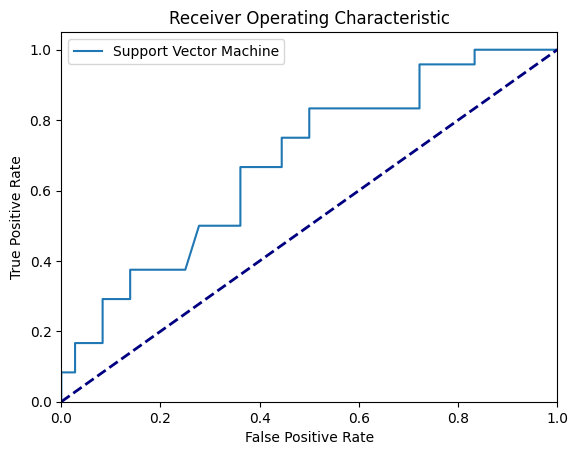

In [ ]:
svm.fit(X_train, y_train)
y_pred_proba = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba)
plot_roc_curve(fpr_svm, tpr_svm, 'Support Vector Machine')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


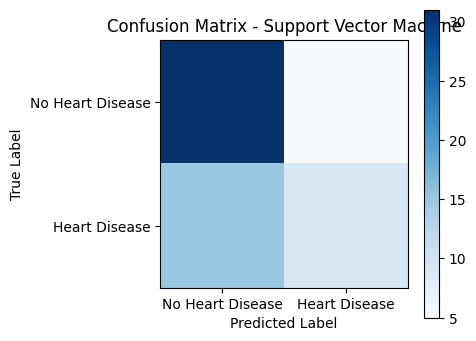

In [ ]:
y_pred = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_svm, 'Confusion Matrix - Support Vector Machine')

# Number of Features vs. Accuracy for SVM

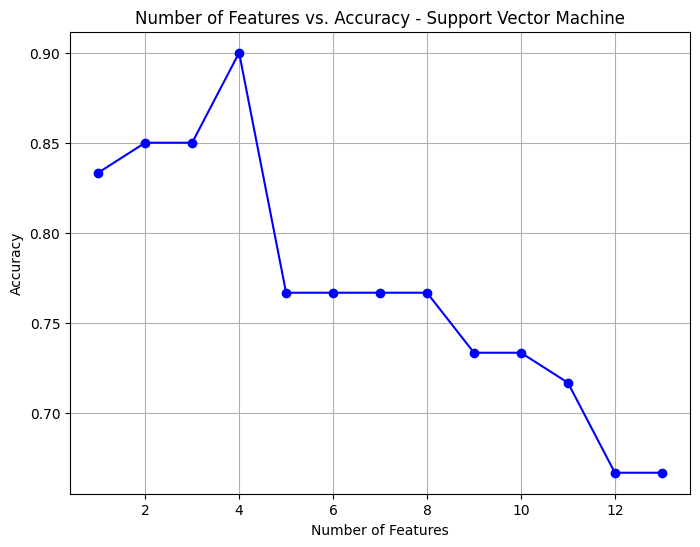

In [ ]:
def calculate_accuracy(num_features):
    selector = SelectKBest(f_classif, k=num_features)
    X_train_new = selector.fit_transform(X_train, y_train)
    X_test_new = selector.transform(X_test)

    model = SVC(probability=True)
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

accuracies = []
for k in range(1, num_features + 1):
    accuracy = calculate_accuracy(k)
    accuracies.append(accuracy) 

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_features + 1), accuracies, 'bo-')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy - Support Vector Machine')
plt.grid(True)
plt.show()       

# K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_model(knn, X_train, X_test, y_train, y_test)
print('K-Nearest Neighbors Results:')
print('Accuracy:', knn_accuracy)
print('Precision:', knn_precision)
print('Recall:', knn_recall)
print('F1 Score:', knn_f1)


K-Nearest Neighbors Results:
Accuracy: 0.6833333333333333
Precision: 0.5862068965517241
Recall: 0.7083333333333334
F1 Score: 0.6415094339622641


# ROC Curve and Confusion Matrix for K-Nearest Neighbors

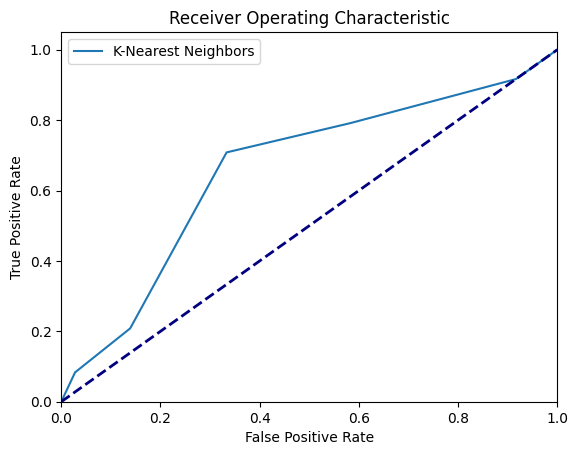

In [ ]:
knn.fit(X_train, y_train)
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba)
plot_roc_curve(fpr_knn, tpr_knn, 'K-Nearest Neighbors')

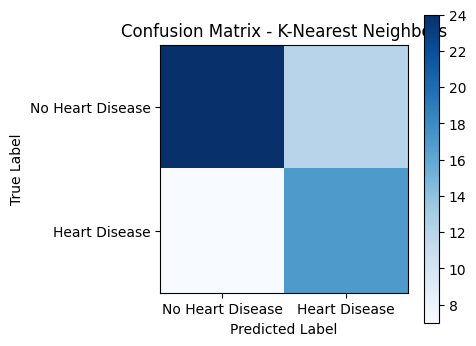

In [ ]:
y_pred = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_knn, 'Confusion Matrix - K-Nearest Neighbors')

# Number of Features vs. Accuracy for K-Nearest Neighbors

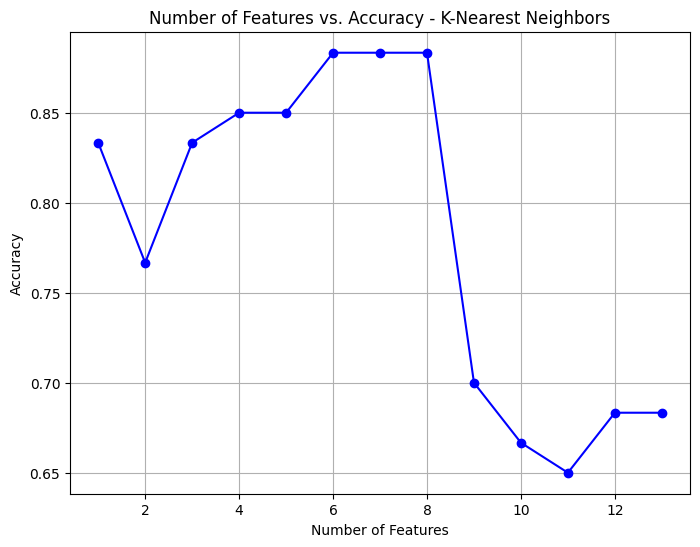

In [ ]:
def calculate_accuracy(num_features):
    selector = SelectKBest(f_classif, k=num_features)
    X_train_new = selector.fit_transform(X_train, y_train)
    X_test_new = selector.transform(X_test)

    model = KNeighborsClassifier()
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

accuracies = []
for k in range(1, num_features + 1):
    accuracy = calculate_accuracy(k)
    accuracies.append(accuracy)
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_features + 1), accuracies, 'bo-')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy - K-Nearest Neighbors')
plt.grid(True)
plt.show()

# Combine Results

In [ ]:
results = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors'],
    'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, knn_accuracy],
    'Precision': [lr_precision, dt_precision, rf_precision, svm_precision, knn_precision],
    'Recall': [lr_recall, dt_recall, rf_recall, svm_recall, knn_recall],
    'F1 Score': [lr_f1, dt_f1, rf_f1, svm_f1, knn_f1]
})

print('\nCombined Results:')
print(results)


Combined Results:
                Algorithm  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.866667   0.807692  0.875000  0.840000
1           Decision Tree  0.783333   0.703704  0.791667  0.745098
2           Random Forest  0.816667   0.760000  0.791667  0.775510
3  Support Vector Machine  0.666667   0.642857  0.375000  0.473684
4     K-Nearest Neighbors  0.683333   0.586207  0.708333  0.641509


#Combined ROC Curve

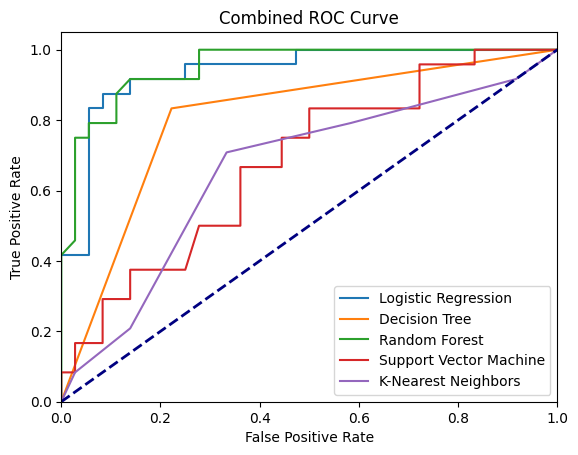

In [ ]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine')
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve')
plt.legend()
plt.show()

# Combined Accuracy Graph

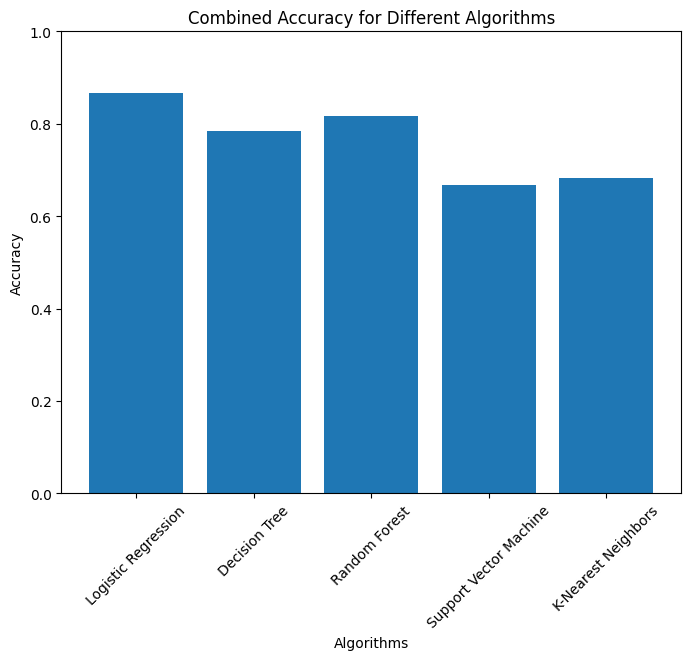

In [ ]:
algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors']
accuracies = [lr_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, knn_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracies)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Combined Accuracy for Different Algorithms')

plt.ylim([0.0, 1.0])  # Set the y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()